# **Evolutionary Computing, lab 1 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $dist[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node
- $k = \lceil n / 2 \rceil$: number of nodes to select  

**Output:**
- $route$: list of nodes forming a closed Hamiltonian cycle  
- $totalCost = \text{distance cost} + \text{node costs}$

### **Random solution**

RANDOM_SOLUTION(nodes, dist, k):
    route = list of all node indices [0..n-1]
    shuffle(route)
    route = first k nodes from route
    route.add(route[0])

    totalCost = calculateTotalCost(route)
    return (route, totalCost)

## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

In [77]:
stats = pd.read_csv('TSPA_stats.csv')
stats

,method_name,min,max,avg,sd
0,random_sol,237031.0,290406.0,264394.26,9907.16
1,nn_at_end,83182.0,89433.0,85108.51,1084.77
2,nn_flexible,71488.0,74410.0,72635.98,641.89
3,greedy_cycle,70526.0,74106.0,71973.30,732.78


#### **3.1.2. Instance B** 

In [78]:
stats = pd.read_csv('TSPB_stats.csv')
stats

,method_name,min,max,avg,sd
0,random_sol,190728.0,238837.0,212542.67,8782.93
1,nn_at_end,52319.0,59030.0,54390.43,1418.59
2,nn_flexible,49001.0,57324.0,51400.60,1450.12
3,greedy_cycle,48508.0,56880.0,50911.65,1432.06


### **3.2. Times** ###

#### **3.2.1. Instance A**

In [79]:
times = pd.read_csv('TSPA_times.csv')
times.rename(columns={'time': 'time (ms)'}, inplace=True)
times

,method_name,time (ms)
0,random_sol,7
1,nn_at_end,14
2,nn_flexible,372
3,greedy_cycle,462


## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [80]:
tsp_a = pd.read_csv('../../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [81]:
tsp_a_random = np.array(pd.read_csv('results/TSPA_random.csv', sep=';', header=None).values).flatten()
tsp_a_nn_end = np.array(pd.read_csv('results/TSPA_nn_end.csv', sep=';', header=None).values).flatten()
tsp_a_flexible = np.array(pd.read_csv('results/TSPA_nn_flexible.csv', sep=';', header=None).values).flatten()
tsp_a_greedy_cycle = np.array(pd.read_csv('results/TSPA_greedy_cycle.csv', sep=';', header=None).values).flatten()

In [82]:
tsp_b_random = np.array(pd.read_csv('results/TSPB_random.csv', sep=';', header=None).values).flatten()
tsp_b_nn_end = np.array(pd.read_csv('results/TSPB_nn_end.csv', sep=';', header=None).values).flatten()
tsp_b_flexible = np.array(pd.read_csv('results/TSPB_nn_flexible.csv', sep=';', header=None).values).flatten()
tsp_b_greedy_cycle = np.array(pd.read_csv('results/TSPB_greedy_cycle.csv', sep=';', header=None).values).flatten()

In [83]:
def plot_tsp(tsp, solution, title):
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

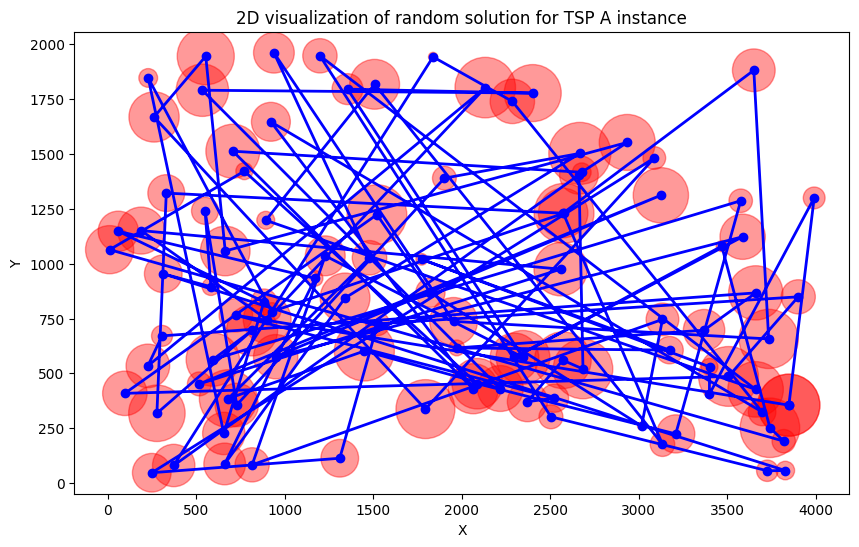

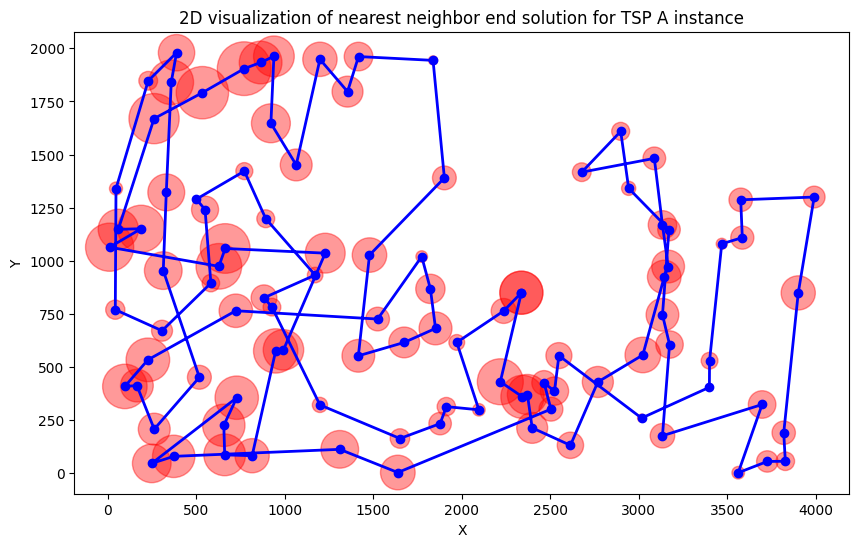

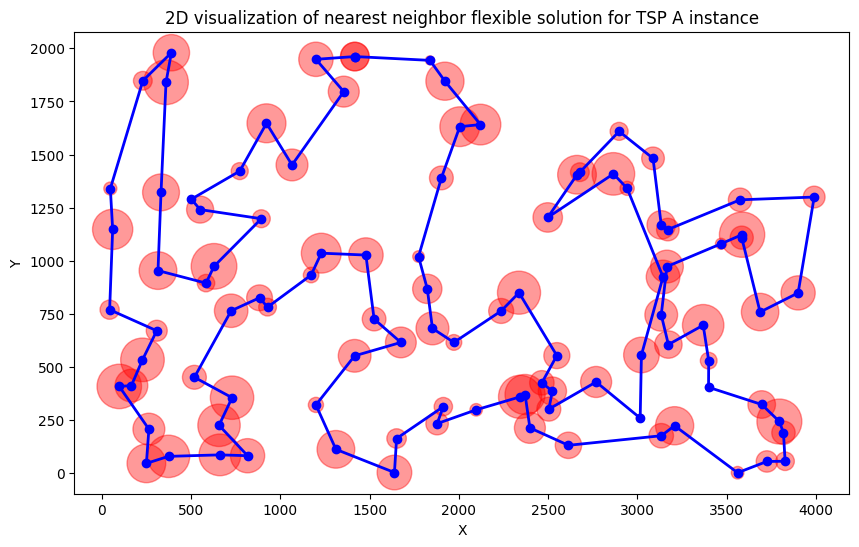

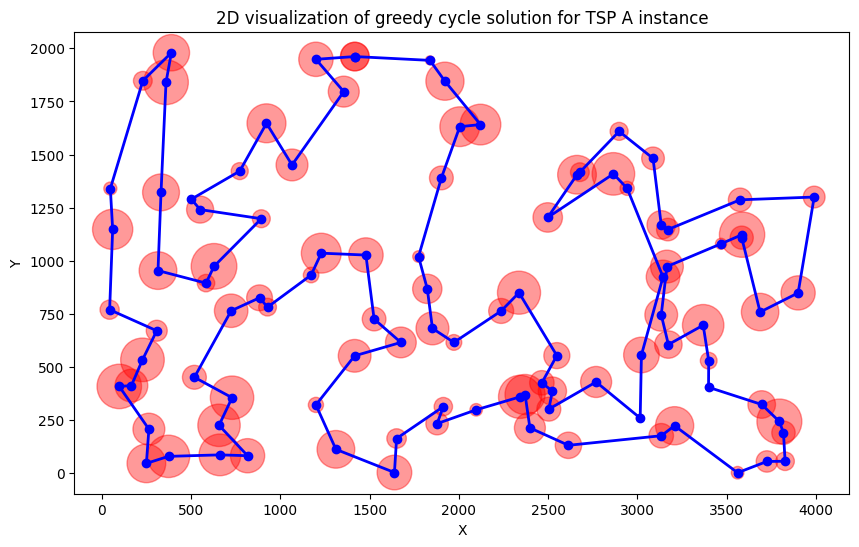

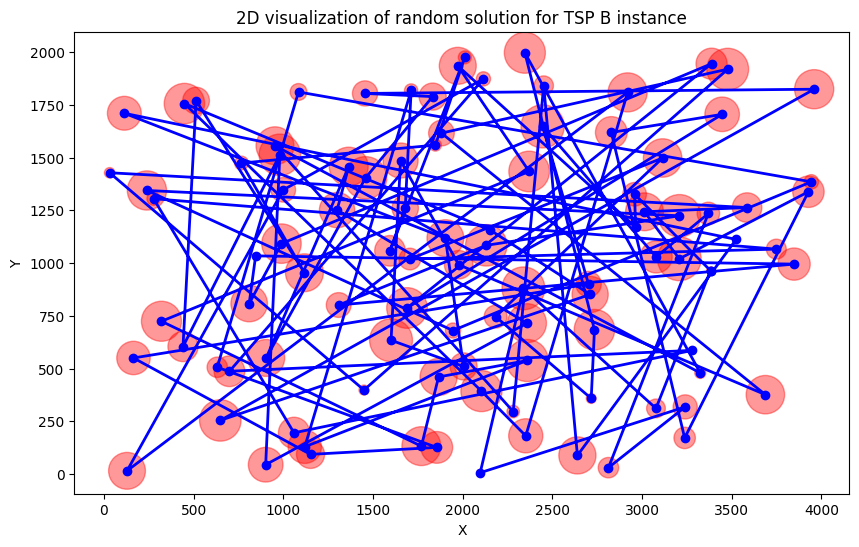

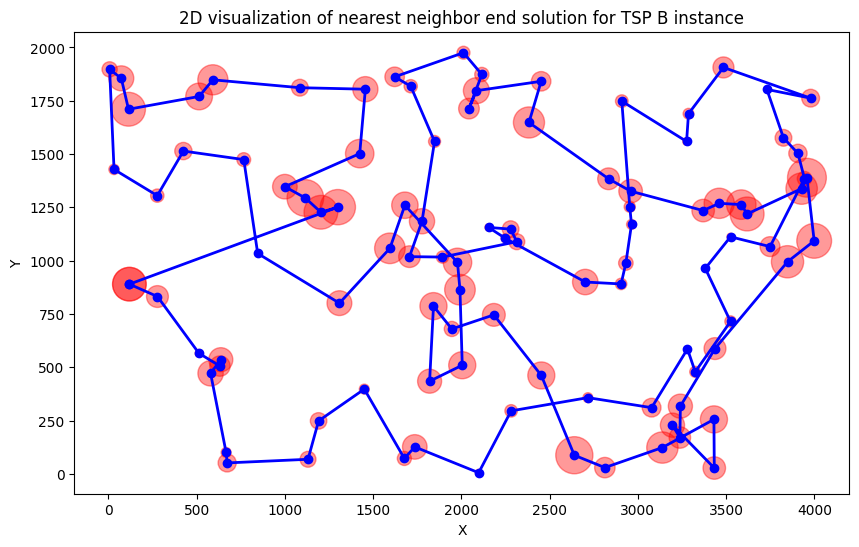

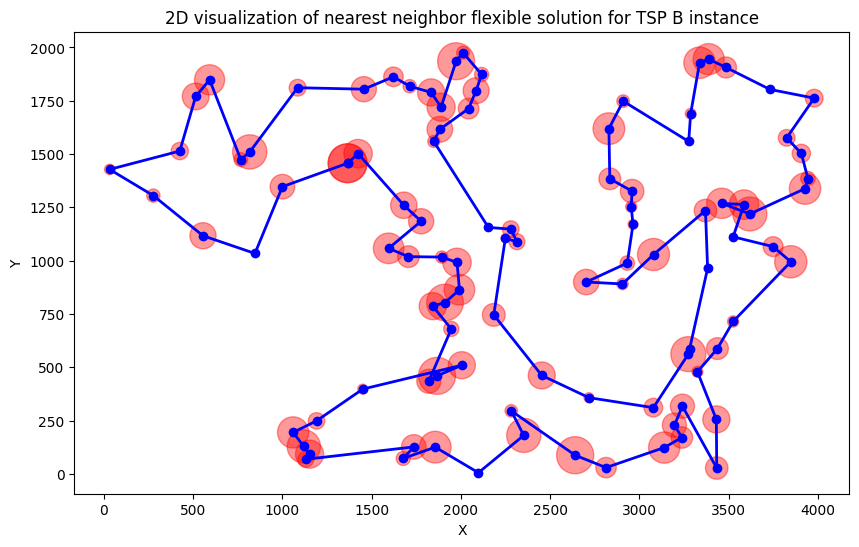

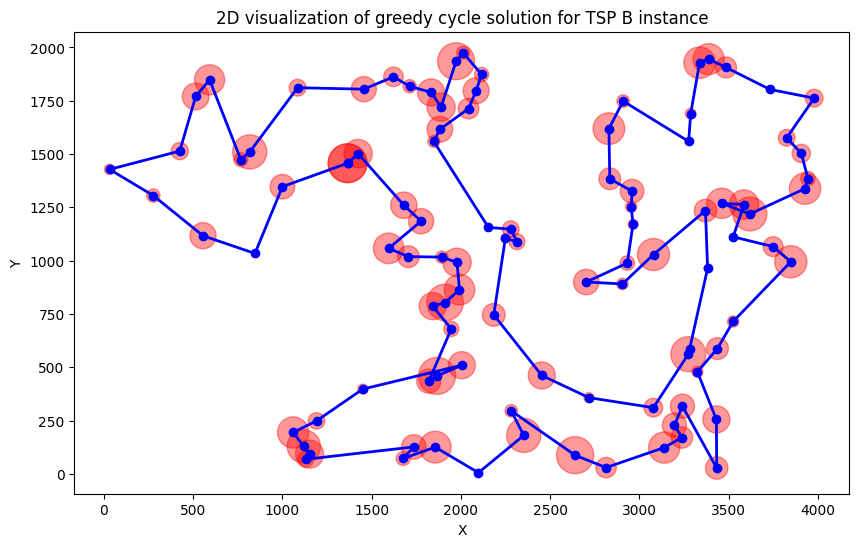

In [84]:
instances = [
    (tsp_a, tsp_a_random, '2D visualization of random solution for TSP A instance'),
    (tsp_a, tsp_a_nn_end, '2D visualization of nearest neighbor end solution for TSP A instance'),
    (tsp_a, tsp_a_flexible, '2D visualization of nearest neighbor flexible solution for TSP A instance'),
    (tsp_a, tsp_a_greedy_cycle, '2D visualization of greedy cycle solution for TSP A instance'),
    (tsp_b, tsp_b_random, '2D visualization of random solution for TSP B instance'),
    (tsp_b, tsp_b_nn_end, '2D visualization of nearest neighbor end solution for TSP B instance'),
    (tsp_b, tsp_b_flexible, '2D visualization of nearest neighbor flexible solution for TSP B instance'),
    (tsp_b, tsp_b_greedy_cycle, '2D visualization of greedy cycle solution for TSP B instance')
]
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

### **5.1. TSP A instance** ###

#### **5.1.1. Random solution** ####

In [87]:
tsp_a_random

array([188,  43,   1,  26,  74,  87,   9, 190, 183, 114,  31,  68, 136,
       110,  62, 155,  96,  67, 199, 173,  14,  10, 127, 151,  81, 168,
        30, 141,  80, 120,  57, 112, 118,  19,   0,  64, 163, 121,  45,
        11,  51,  93, 122,  17,   7,  37,  44, 153, 115,  38, 117, 101,
       171, 175, 181,  42,  41,  35, 137,  61,  72,   4,  59, 146, 116,
        84,  18,  65,  33, 159, 104,  77,  28, 165,  25, 182, 139, 103,
       113,  13, 185, 189, 119, 131,  32, 184, 111, 195,  47,  83,  48,
       160, 169, 179,  63,  92, 176, 145,  78,  90, 188])

#### **5.1.2. Nearest neighbour adding new node at the end** ####

In [88]:
tsp_a_nn_end

array([124,  94,  63,  53, 180, 154, 135, 123,  65, 116,  59, 115, 139,
       193,  41,  42, 160,  34,  22,  18, 108,  69, 159, 181, 184, 177,
        54,  30,  48,  43, 151, 176,  80,  79, 133, 162,  51, 137, 183,
       143,   0, 117,  46,  68,  93, 140,  36, 163, 199, 146, 195, 103,
         5,  96, 118, 149, 131, 112,   4,  84,  35,  10, 190, 127,  70,
       101,  97,   1, 152, 120,  78, 145, 185,  40, 165,  90,  81, 113,
       175, 171,  16,  31,  44,  92,  57, 106,  49, 144,  62,  14, 178,
        52,  55, 129,   2,  75,  86,  26, 100, 121, 124])

#### **5.1.3. Nearest neighbour adding new node anywhere** ####

In [89]:
tsp_a_flexible

array([143, 183,  89, 186,  23, 137, 176,  80,  79,  63,  94, 124, 152,
        97,   1, 101,   2, 120, 129,  55,  49, 102, 148,   9,  62, 144,
        14, 178, 106, 165,  90,  81, 196,  40, 119, 185,  52,  57,  92,
       179, 145,  78,  31,  56, 113, 175, 171,  16,  25,  44,  75,  86,
        26, 100,  53, 154, 180, 135,  70, 127, 123, 162, 133, 151,  51,
       118,  59,  65, 116,  43, 184,  35,  84, 112,   4, 190,  10, 177,
        30,  54,  48, 160,  34, 146,  22,  18, 108,  69, 159, 181,  42,
         5, 115,  41, 193, 139,  68,  46,   0, 117, 143])

#### **5.1.4. Greedy cycle solution** ####

In [90]:
tsp_a_greedy_cycle

array([143, 183,  89, 186,  23, 137, 176,  80,  79,  63,  94, 124, 152,
        97,   1, 101,   2, 120, 129,  55,  49, 102, 148,   9,  62, 144,
        14, 178, 106, 165,  90,  81, 196,  40, 119, 185,  52,  57,  92,
       179, 145,  78,  31,  56, 113, 175, 171,  16,  25,  44,  75,  86,
        26, 100,  53, 154, 180, 135,  70, 127, 123, 162, 133, 151,  51,
       118,  59,  65, 116,  43, 184,  35,  84, 112,   4, 190,  10, 177,
        30,  54,  48, 160,  34, 146,  22,  18, 108,  69, 159, 181,  42,
         5, 115,  41, 193, 139,  68,  46,   0, 117, 143])

### **5.2. TSP B instance** ###

#### **5.2.1. Random solution** ####

In [94]:
tsp_b_random

array([ 86,  55,  62, 161,  69,  24,  79,  87,  14, 142, 169, 139, 182,
        70, 168,  90, 158, 133, 198,  67, 162,  41,  74,  85, 173,   2,
       132,   6,  23, 105, 159,  29,  44,  58,  97,  53, 108,  51,   3,
        73, 176,  45, 135, 179, 138, 174, 111, 153, 119,  84, 113,  71,
        77, 155, 146, 185, 100,  49,  82, 171,  43, 160,  76, 195, 101,
       177,  63,  99,  83, 110,  66, 127, 170, 199, 157, 149, 116,  19,
       121, 172,  25,  39, 181,  32,   8,  94, 147,  31,  91,  78,  42,
       143, 167, 128,  95, 187, 103, 141,  37, 163,  86])

#### **5.2.2. Nearest neighbour adding new node at the end** ####

In [95]:
tsp_b_nn_end

array([ 16,   1, 117,  31,  54, 193, 190,  80, 175,   5, 177,  36,  61,
       141,  77, 153, 163, 176, 113, 166,  86, 185, 179,  94,  47, 148,
        20,  60,  28, 140, 183, 152,  18,  62, 124, 106, 143,   0,  29,
       109,  35,  33, 138,  11, 168, 169, 188,  70,   3, 145,  15, 155,
       189,  34,  55,  95, 130,  99,  22,  66, 154,  57, 172, 194, 103,
       127,  89, 137, 114, 165, 187, 146,  81, 111,   8, 104,  21,  82,
       144, 160, 139, 182,  25, 121,  90, 122, 135,  63,  40, 107, 100,
       133,  10, 147,   6, 134,  51,  98, 118,  74,  16])

#### **5.2.3. Nearest neighbour adding new node anywhere** ####

In [96]:
tsp_b_flexible

array([ 85,  51, 121, 131, 135,  63, 122, 133,  10,  90, 191, 147,   6,
       188, 169, 132,  13, 161,  70,   3,  15, 145, 195, 168,  29, 109,
        35,   0, 111,  81, 153, 163, 180, 176,  86,  95, 128, 106, 143,
       124,  62,  18,  55,  34, 170, 152, 183, 140,   4, 149,  28,  20,
        60, 148,  47,  94,  66,  22, 130,  99, 185, 179, 172, 166, 194,
       113, 114, 137, 103,  89, 127, 165, 187, 146,  77,  97, 141,  91,
        36,  61, 175,  78, 142,  45,   5, 177,  82,  87,  21,   8, 104,
        56, 144, 160,  33, 138, 182,  11, 139, 134,  85])

#### **5.2.4. Greedy cycle solution**

In [97]:
tsp_b_greedy_cycle

array([ 85,  51, 121, 131, 135,  63, 122, 133,  10,  90, 191, 147,   6,
       188, 169, 132,  13, 161,  70,   3,  15, 145, 195, 168,  29, 109,
        35,   0, 111,  81, 153, 163, 180, 176,  86,  95, 128, 106, 143,
       124,  62,  18,  55,  34, 170, 152, 183, 140,   4, 149,  28,  20,
        60, 148,  47,  94,  66,  22, 130,  99, 185, 179, 172, 166, 194,
       113, 114, 137, 103,  89, 127, 165, 187, 146,  77,  97, 141,  91,
        36,  61, 175,  78, 142,  45,   5, 177,  82,  87,  21,   8, 104,
        56, 144, 160,  33, 138, 182,  11, 139, 134,  85])

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab1

## **8. Conclusions**